In [47]:
import pandas as pd

data = {
    "tanggal": ["2022-02-03", "2021-02-06", "2023-04-02", "2025-08-17", "2025-07-03", "2025-06-11"],
    "produk": ["Lisah Curah", "Besreng", "Sari Dewi", "Pinto", "Milkuat", "Ciki Aries"],
    "Jumlah Terjual": [7, 10, 5, 8, 11, 10],
    "Stok": [10, 15, 8, 12, 25, 20],
    "Harga Satuan": [15000, 16000, 19000, 18000, 10000, 250000],
}

df = pd.DataFrame(data)
df.to_csv("data_Penjualan_Latihan.csv", index=False)
print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!")

File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!


In [48]:
df = pd.read_csv("data_Penjualan_Latihan.csv")
print(df.head())

      tanggal       produk  Jumlah Terjual  Stok  Harga Satuan
0  2022-02-03  Lisah Curah               7    10         15000
1  2021-02-06      Besreng              10    15         16000
2  2023-04-02    Sari Dewi               5     8         19000
3  2025-08-17        Pinto               8    12         18000
4  2025-07-03      Milkuat              11    25         10000


In [67]:
import pandas as pd

df = pd.read_csv("data_Penjualan_Latihan.csv")

print("Data yang hilang sebelum pengisian:")
print(df.isnull().sum())

df.fillna({"Jumlah Terjual": 8, "Harga Satuan": df["Harga Satuan"].median(), "tanggal": "2000-01-01"}, inplace=True)
df["tanggal"] = pd.to_datetime(df["tanggal"])
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

print(df.head())

df.to_csv("data_Penjualan_Latihan_Cleaned.csv", index=False)
print("File CSV yang telah diperbaiki berhasil disimpan sebagai 'data_Penjualan_Latihan_Cleaned.csv'!")


Data yang hilang sebelum pengisian:
tanggal           0
produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     tanggal       produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2022-02-03  Lisah Curah               7    10         15000   
1 2021-02-06      Besreng              10    15         16000   
2 2023-04-02    Sari Dewi               5     8         19000   
3 2025-08-17        Pinto               8    12         18000   
4 2025-07-03      Milkuat              11    25         10000   

   Total Penjualan  Keuntungan  
0           105000       35000  
1           160000       60000  
2            95000       45000  
3           144000       64000  
4           110000           0  
File CSV yang telah diperbaiki berhasil disimpan sebagai 'data_Penjualan_Latihan_Cleaned.csv'!


In [68]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv("data_Penjualan_Latihan_Cleaned.csv")

x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)


Akurasi model: 1.0


In [69]:
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("produk perlu di-restock!")
else:
  print("stok masih cukup.")

stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


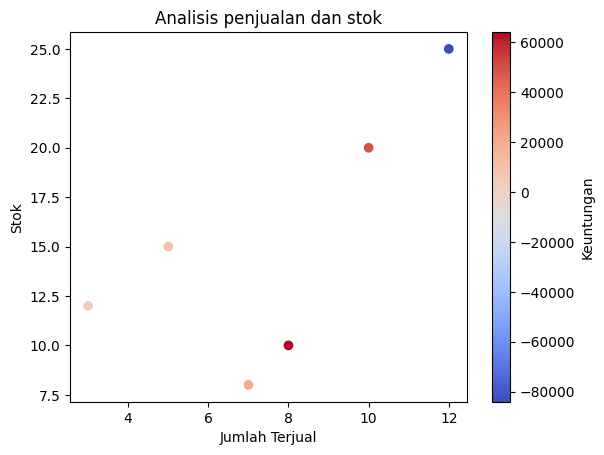

In [19]:
import matplotlib.pyplot as plt

# Correct the column name from 'stok' to 'Stok'
plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")  # Correct the column name here as well
plt.title("Analisis penjualan dan stok")
plt.colorbar(label="Keuntungan")  # Assuming 'keuntungan' is a column in your DataFrame
plt.show()